In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

In [3]:
#image stored in arr
img = open_image('f090819t01p00r06rdn_b_sc01_ort_img.hdr')
print img
arr = img.load()
block = []
for i in range(224):
    data = arr[2500:2510,450:460,i].astype(np.float32)
    block.append(data)
print "process complete"
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[2500:2540,450:490,i].astype(np.float32)
    block.append(data)
print "process complete"

	Data Source:   '././f090819t01p00r06rdn_b_sc01_ort_img'
	# Rows:           6955
	# Samples:         781
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16
process complete
process complete


In [4]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [5]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

157


In [6]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [7]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


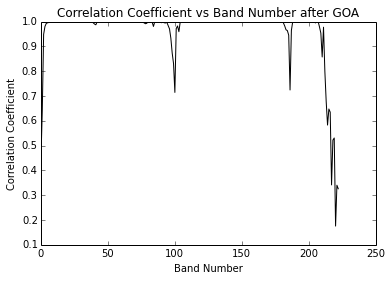

In [8]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [9]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

Process Complete


In [10]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [11]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [12]:
len(finlist)

22400

In [13]:
finlist = list(finlist)

In [14]:
float(finlist[0])

0.5555555820465088

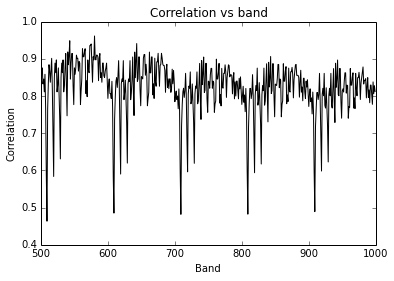

In [15]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [16]:
from audiolazy import lpc

In [17]:
y = 20 #frame size

In [18]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [19]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [20]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [21]:
N = 256    #The number of Clusters
data = np.array(errorframe)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

distortion =  395.178670804
distortion =  111.539044057
distortion =  81.2051875337
distortion =  75.4686494304
distortion =  72.632976646
distortion =  71.4144354631
distortion =  70.8319027513
distortion =  70.7247149602
distortion =  70.3163367446
distortion =  70.240766089
distortion =  70.1554334873
distortion =  69.920625334
distortion =  69.7236388044
distortion =  69.6258112561
distortion =  69.6083131897


In [22]:
np.sum(distortion[0])
dist = D

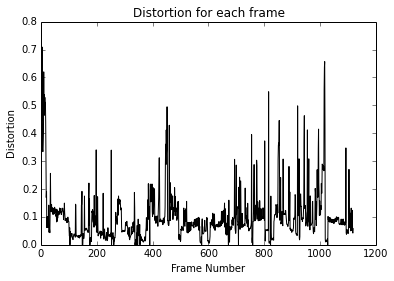

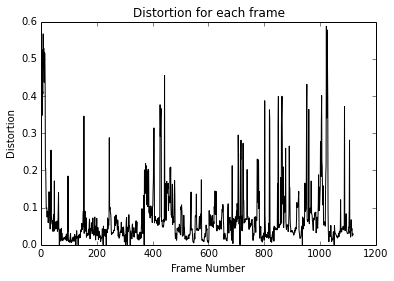

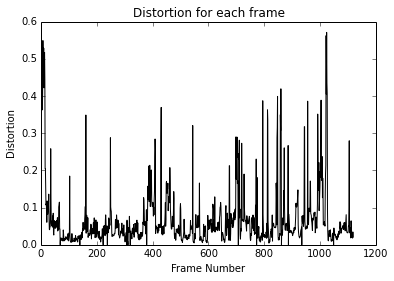

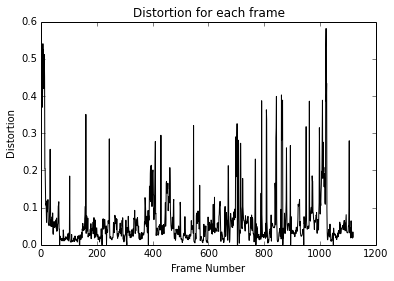

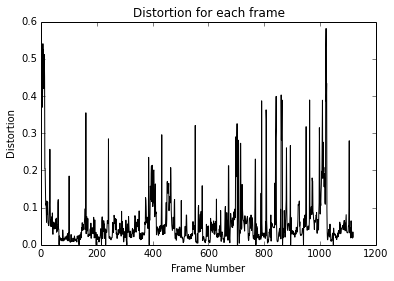

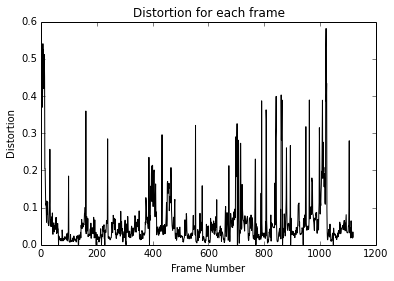

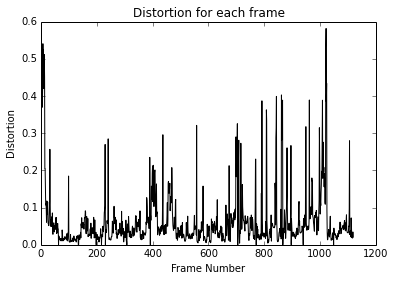

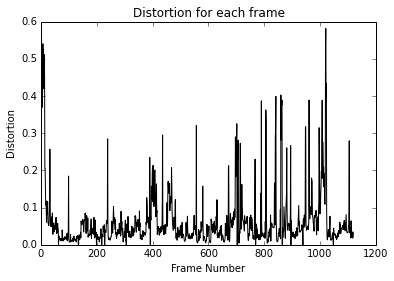

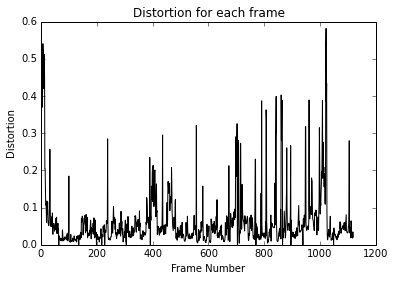

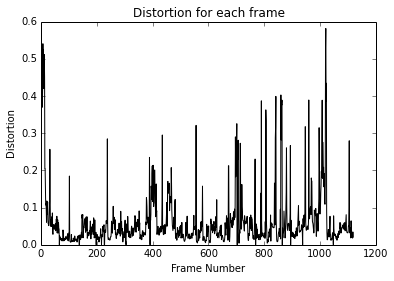

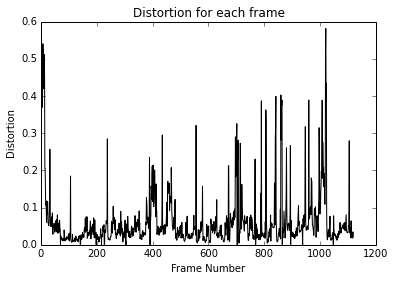

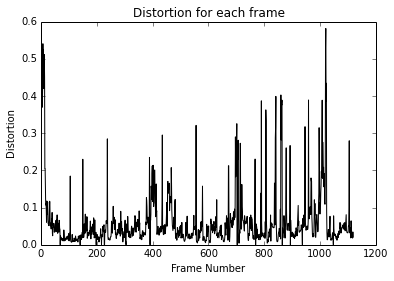

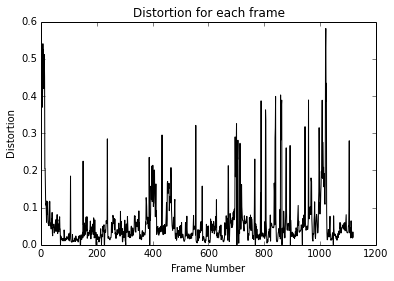

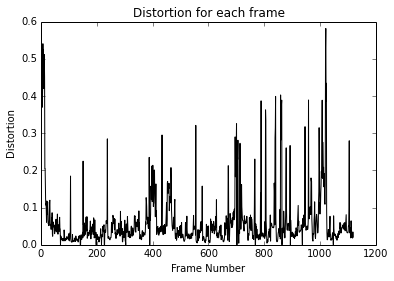

In [23]:
#plot of distortion

for i in range(1,len(distortion)-1):
    plt.figure(12+i)
    plt.plot(range(len(finlist)/y),distortion[i], 'k')
    plt.xlabel('Frame Number')
    plt.ylabel('Distortion')
    plt.title('Distortion for each frame')
    plt.show()

In [24]:
for i in range(len(clustering.codebook)):
    codebook = clustering.codebook[i]
    print "Cluster%d" % (i)
    print "\tcentroid:%s" % (codebook.centroid)
    print "\tvectors:"
    for j in codebook.vector:
        print "\t\t%s" % (j)

Cluster0
	centroid:[ 0.          0.52030891  0.73246436  0.80405699  0.87004141  0.58862983
  0.54552258  0.61133039  0.52211512  0.50089268  0.54081054  0.53509548
  0.50667404  0.57195968  0.63120253  0.62977658  0.38265406  0.48789971
  0.62591271  0.48664385]
	vectors:
		[ 0.          0.42817891  0.78681913  0.82372705  0.89488373  0.48705142
  0.46612796  0.59624213  0.61176234  0.52130021  0.50095363  0.4201442
  0.39979761  0.83280287  0.67762844  0.59245689  0.43566441  0.56624282
  0.53095293  0.32968206]
		[ 0.          0.63754445  0.81145338  0.76883016  0.84076538  0.48781623
  0.61392507  0.60939208  0.47239381  0.53606932  0.6058107   0.68256948
  0.61765175  0.54557122  0.610489    0.54089292  0.25629762  0.45214779
  0.66605014  0.40045861]
		[ 0.          0.49520336  0.59912056  0.81961377  0.87447513  0.79102186
  0.55651472  0.62835696  0.48218921  0.44530852  0.51566728  0.50257276
  0.50257276  0.33750496  0.60549016  0.75597994  0.45600016  0.44530852
  0.68073505

In [25]:
a = 0
for i in range(len(clustering.codebook)):
    a = len(clustering.codebook[i].vector) + a
print a

1120


In [26]:
len(position)

1120

In [27]:
clustering.codebook[position[2]].centroid

array([ 0.        ,  0.42335308,  0.43914927,  0.46429298,  0.42720428,
        0.55100772,  0.42714652,  0.38112364,  0.40456431,  0.24734293,
        0.44873729,  0.63099849,  0.44270164,  0.53433638,  0.4480953 ,
        0.47354018,  0.46762573,  0.48905589,  0.6621037 ,  0.52022854])

In [28]:
errorframe[2]

[0.0,
 0.6500498261578379,
 0.5413958014124576,
 0.4754072253702918,
 0.39510503057502794,
 0.4769586667395013,
 0.5871146066320084,
 0.4061156701284871,
 0.3778133461303087,
 0.297511177927887,
 0.4722290708087252,
 0.6862599023330657,
 0.5099905883531626,
 0.6611357328964538,
 0.32426205591886514,
 0.36052166463887325,
 0.3966564736289443,
 0.4832397103621845,
 0.8657073679212516,
 0.810604628749324]

In [29]:
huffcodebook = position

In [30]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

Symbol	Weight	Huffman Code


In [31]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

6442


In [32]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

55.634895995


In [33]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

0.287589285714


In [34]:
sum(lenhuff)

6442

In [35]:
#huffcodebook - vector de-quantization
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [36]:
len(errordecode)

1120

In [37]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e

[1, -0.7707220086078213, -0.183119205225462, 0.04343726954285332]
---
1.60118820334
---
1 - 0.770722 * z^-1 - 0.183119 * z^-2 + 0.0434373 * z^-3
---
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088, 0.4444444477558136, 0.4444444477558136, 1.0, 0.6666666865348816, 0.6666666865348816, 0.4444444477558136, 0.6666666865348816, 0.5555555820465088, 0.3333333432674408, 0.5555555820465088]
---
[0.5555555820465088, 0.4607099814233554, 0.10206976389089026, 0.17627295450593167, -0.45043928238357445, 0.06850416588050404, 0.20053872794980115, 0.07042455544802342, -0.05620676189652986, 0.03425537472827295, -0.056509182416839485, 0.024300251187527547, 0.6002023860346742, -0.16613618283881243, -0.010961753134307615, -0.14801244420774196, 0.23100227581588353, -0.010687239153115983, -0.19761959133506812, 0.22587352210302558]
---
[0.0, 0.52030890770235494, 0.7324643580809

In [38]:
from scipy.signal import lfilter

In [39]:
estx = []

In [40]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [41]:
estx

[0.55555558204650879]

In [42]:
esty = list(lpcfunction[0](estx))

In [43]:
esty

[0.55555558204650879]

In [44]:
len(lpcfunction)

1120

In [45]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [46]:
print estx[0]
print finli[0]

[0.55555558204650879, 0.98101888912571034, 0.83453412197187526, 0.98032994622529546, 0.41960213197094254, 0.65713399955775587, 0.74606131237910489, 0.68175494400307246, 0.4659083598480952, 0.53514805794622022, 0.48430135670907876, 0.55939572965756812, 1.1068764257801349, 0.4058235006304643, 0.62024078015850492, 0.48176413854705047, 0.61365633949297604, 0.47721247319675564, 0.4282931188314445, 0.71251737337057786]
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088, 0.4444444477558136, 0.4444444477558136, 1.0, 0.6666666865348816, 0.6666666865348816, 0.4444444477558136, 0.6666666865348816, 0.5555555820465088, 0.3333333432674408, 0.5555555820465088]


In [47]:
print esty[0]
print reslpcfin[0]

[0.55555558204650879, 0.55283997503743854, -0.023291623380150034, 0.18162454976322254, -0.44616617651739299, 0.1904700445767086, 0.20533932351327294, 0.0046415859633837583, -0.16760922787977531, 0.083626673834121312, 0.016147775287897178, 0.10837591520336554, 0.61029831632012987, -0.5286698943774335, 0.12907196833139956, -0.022503468597089842, 0.1463999810296599, -0.057024673579702742, -0.030950779470615676, 0.32169122756184138]
[0.5555555820465088, 0.4607099814233554, 0.10206976389089026, 0.17627295450593167, -0.45043928238357445, 0.06850416588050404, 0.20053872794980115, 0.07042455544802342, -0.05620676189652986, 0.03425537472827295, -0.056509182416839485, 0.024300251187527547, 0.6002023860346742, -0.16613618283881243, -0.010961753134307615, -0.14801244420774196, 0.23100227581588353, -0.010687239153115983, -0.19761959133506812, 0.22587352210302558]


In [48]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [49]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [50]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [51]:
len(maxblock)

224

In [52]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

Process Complete


In [53]:
finblockfin[0]

array([[ 2.48888847,  6.74190332,  5.27761279,  6.73501651,  1.12987105,
         3.5042863 ,  4.3932212 ,  3.7504021 ,  1.59275721,  2.28489084],
       [ 1.77661722,  2.52727534,  8.        ,  0.99213714,  3.13549442,
         1.75125469,  3.06967506,  1.70575535,  1.21674787,  4.05790939],
       [ 2.48888847,  5.36143764,  0.2814558 ,  3.33129853,  2.37680013,
         2.96386179,  6.69971879,  0.85647405,  0.7316709 ,  2.13020476],
       [ 2.00653285,  5.24728032, -0.5976825 ,  3.33129853,  2.37680013,
         2.96386179,  6.69971879, -0.25421469,  0.72309779,  1.58978179],
       [ 4.71026535,  0.22278322,  1.46681203,  1.26709953,  2.8097589 ,
         4.33978576, -0.22087273,  1.12837448,  0.53491915,  1.98739684],
       [ 4.47543691,  1.93648452,  4.03763179, -1.        ,  2.6160612 ,
         2.50795503,  3.19831115,  6.98978193,  3.78569149, -0.41376804],
       [ 1.37819972,  1.18728411,  5.32901094,  2.62281689,  2.9997304 ,
        -0.46129805,  2.63628512,  2.64100202

In [54]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [55]:
aaa = []
for i in range(10):
    for j in range(10):
        aa = rblock[0][i][j][0]
        aaa.append(aa)

In [56]:
psnr = []
mse = []
snr = []
snrr = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    squ = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
            squ1 = aq[j][k]**2
            squ.append(squ1)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    p = 0.01*sum(squ)
    snr1 = 10*log10(p/mse1)
    snrr.append(20*np.log10(100.0/(mse1**0.5)))
    snr.append(snr1)
    psnr.append(psnr1)
print "process complete"

process complete


In [57]:
psnr1 = np.average(psnr)

In [58]:
sdr = 10*np.log10(variance**2/dist)

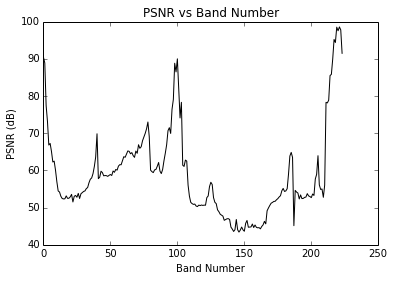

In [59]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [60]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist

cr =  55.634895995
bpp=  0.287589285714
sdr=  56.5779480747
psnr=  58.8776662749
dist=  69.6083131897
